# N-uncial Proyection: Numerical Implementation

El propósito de este documento es presentar la implementación numérica del artículo "Inverses and n-uncial property of Jacobian elliptic functions" (Solanilla, Leal, Tique, 2021) utilizando el lenguaje de programación Python. Este trabajo se centra en la creación de mapas del planeta Tierra mediante las proyecciones n-unciales, las cuales son obtenidas a partir de la generalización de la propiedad de quincuncialidad presente en la inversa de función elíptica de Jacobi $c_{n}$, relacionada con la proyección quincuncial de Peirce (Solanilla, Oostra, Yáñez, 2016). A saber, se demostró que todas las inversas de las funciones elípticas de Jacobi son n-unciales.

Para lograr la implementación numérica se emplea el archivo "toolbox.py" que proporciona el código necesario para generar coordenadas esféricas de los meridianos, paralelos y paises; mapear la proyección estereográfica y visualizar cada etapa del proceso.

Cada proyección n-uncial es la composición de la proyección estereográfica con la inversa de una función eliptica de Jacobi. En ese sentido, este cuaderno está dividido en tres secciones:

**1.** En la primera, se importa el archivo "toolbox.py" para ser usado en las siguientes secciones. Además se cargan los datos geoespaciales de tierra firme y se obtienen sus coordenadas esféricas.

**2.** Se realiza la primera composicion mapeando las coordenadas iniciales con la proyección estereográfica.

**3.** Se transforman las coordenas estereograficas usando cada inversa de las funciones elipticas de Jacobi con modulo $\frac{1}{\sqrt{2}}$, para ser graficadas posteriormente. Como resultado, el mapamundi segun la respectiva proyección n-uncial.


## 1. Importe de archivos y generación de coordenadas esfericas

In [1]:
from Functions.toolbox import *

A continuación se genera una cantidad específica de puntos (num_puntos) distribuidos sobre cada país y se grafica en la esfera terrestre. Ya que el número de puntos a gráficar sobre cada país es el mismo, en los paises más pequeños habrá mayor concentración de puntos que en los paises grandes. Luego se grafica la esfera terrestre con las coordenadas generadas.

In [2]:
ruta = "data/ne_110m_admin_0_countries.shp" # cargar información geoespacial de los continentes
coord = generar_puntos_en_continentes(ruta, 1000000) # se pasa el numero de puntos aleatorios a generar en coordenadas esfericas

esfera_terrestre = [(x[0]+np.pi,x[1]+(np.pi/2)) for x in coord]# expresar en formato (theta, p)
sur_esf = [x for x in esfera_terrestre if x[1]<np.pi/2] # filtrar hemisferios
norte_esf = [x for x in esfera_terrestre if x[1]>np.pi/2]

In [ ]:
#Gráfico de la esfera terrestre generada
#plot_esfera(esfera_terrestre, "Coordenadas generadas: Tierra firme en la esfera terrestre")

## 2. Proyección estereográfica
En esta sección se transforman las coordenadas antes generadas mediante la proyección estereográfica. Se hace necesaria una inversión de cada eje, pues en las coordenadas esféricas cargadas inicialmente la tierra se encuentra "de cabeza". 

In [3]:
# creación de listas con el mapeo estereográfico de cada hemisferio y del mapa completo 
coord_est = []
for punto in esfera_terrestre:
    x = punto[0]
    y = punto[1]
    coord_est.append(estereografica(-x, -y))

sur_est = []
for punto in sur_esf:
    x = punto[0]
    y = punto[1]
    sur_est.append(estereografica(-x, -y))

norte_est = []
for punto in norte_esf:
    x = punto[0]
    y = punto[1]
    norte_est.append(estereografica(-x, -y))

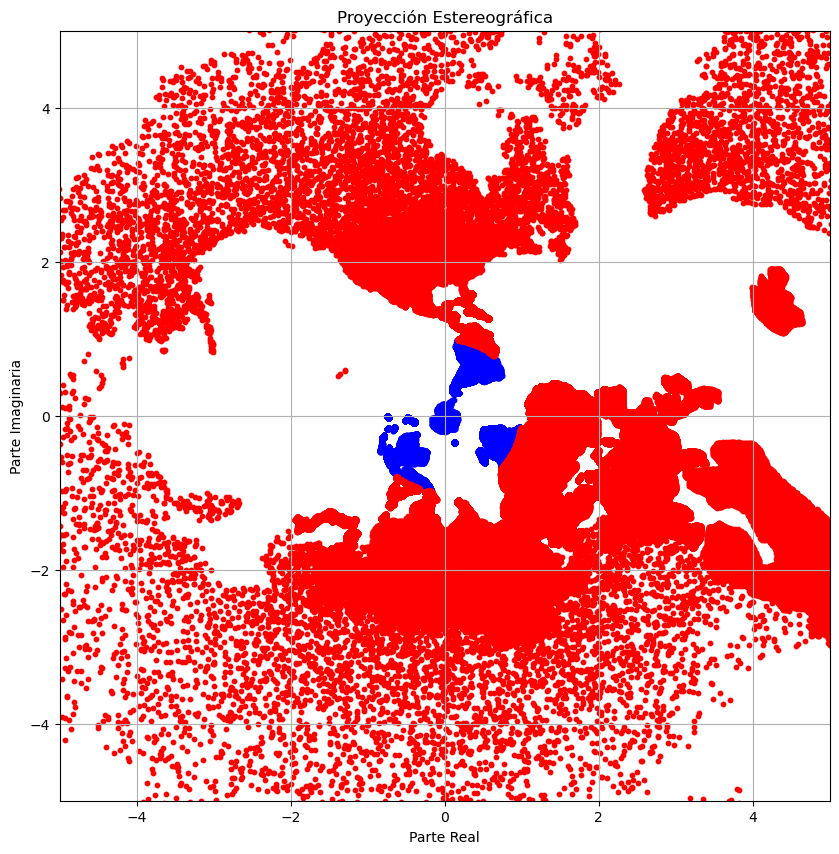

In [4]:
plot_estereografica(coord_est) #función que grafica la proyección estereográfica sobre el plano complejo.

## 3. Proyección N-uncial

En esta sección se define cada una de las inversas de las funciones elipticas de Jacobi y se aplican a las coordenadas estereográficas de la sección 2 con el fin de visualizar los mapas de la tierra producidos por cada una de ellas.

### 3.1 $cn^{-1}z= F(arc cos z)$ (Proyección quincuncial)

In [5]:
sur=[(np.real(punto), np.imag(punto)) for punto in sur_est]
norte=[(np.real(punto), np.imag(punto)) for punto in norte_est]

def cni(punto):
    a=punto[0]
    b=punto[1]
   
    x=ellipf(np.arccos(a), 0.5)
    y=ellipf(np.arccos(b), 0.5)
    return (x,y)

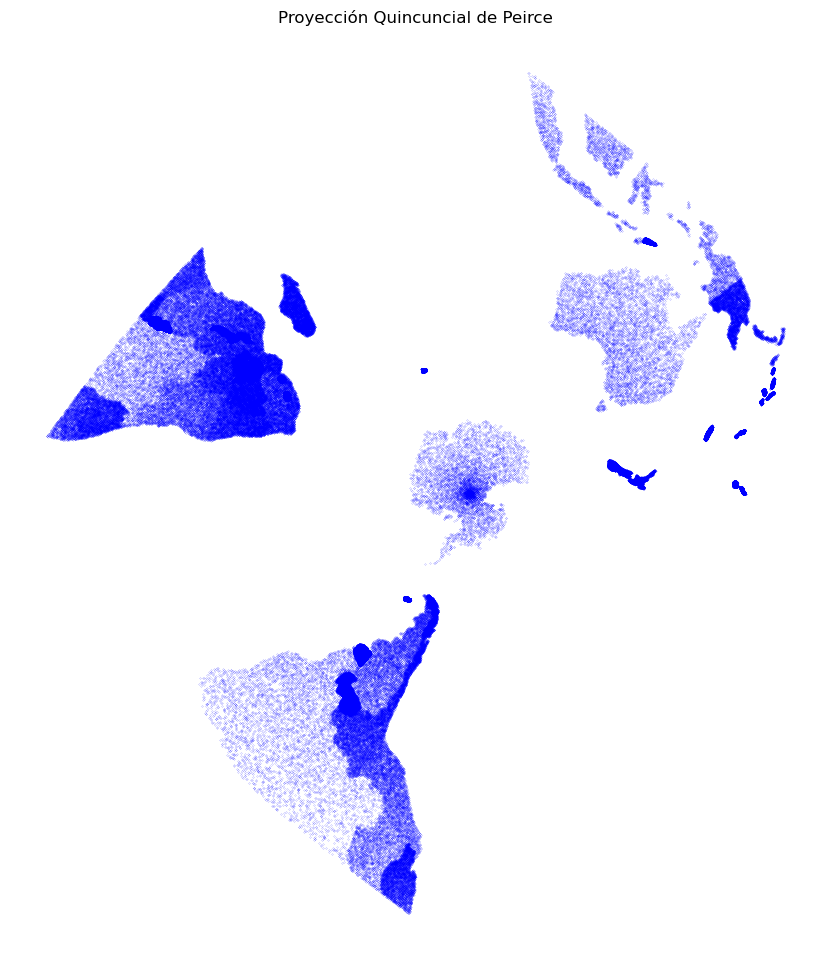

In [6]:
plot_proyeccion(sur, cni, "Proyección Quincuncial de Peirce") # Hemisferio sur

### 3.2 cd

In [7]:
def cdi(punto):
    a=punto[0]
    b=punto[1]
    k=1/np.sqrt(2)
    x=ellipf(np.arcsin(np.sqrt((1-(a**2))/(1-(k**2)*(a**2)))), 0.5)
    y=ellipf(np.arcsin(np.sqrt((1-(b**2))/(1-(k**2)*(b**2)))), 0.5)
    return (x,y)

cni((1/np.sqrt(2)+0.00001,-1))

(mpf('0.82600154624064492'), mpf('3.7081493546027438'))

**NOTA.** Tanto la inversa de cd como la invesa de cn tienen, en su caracterización en la Tabla 8 (art. 2021), dominio el intervalo real [-1,1]. Esto permite visualizar que pasa en la situación actual (en las otras, ni se diga). Necesito entender los dominios básicos de estas funciones para poder dividirlos correctamente en dos y hacer las funciones inyectivas. Ver gráfico a continuación:

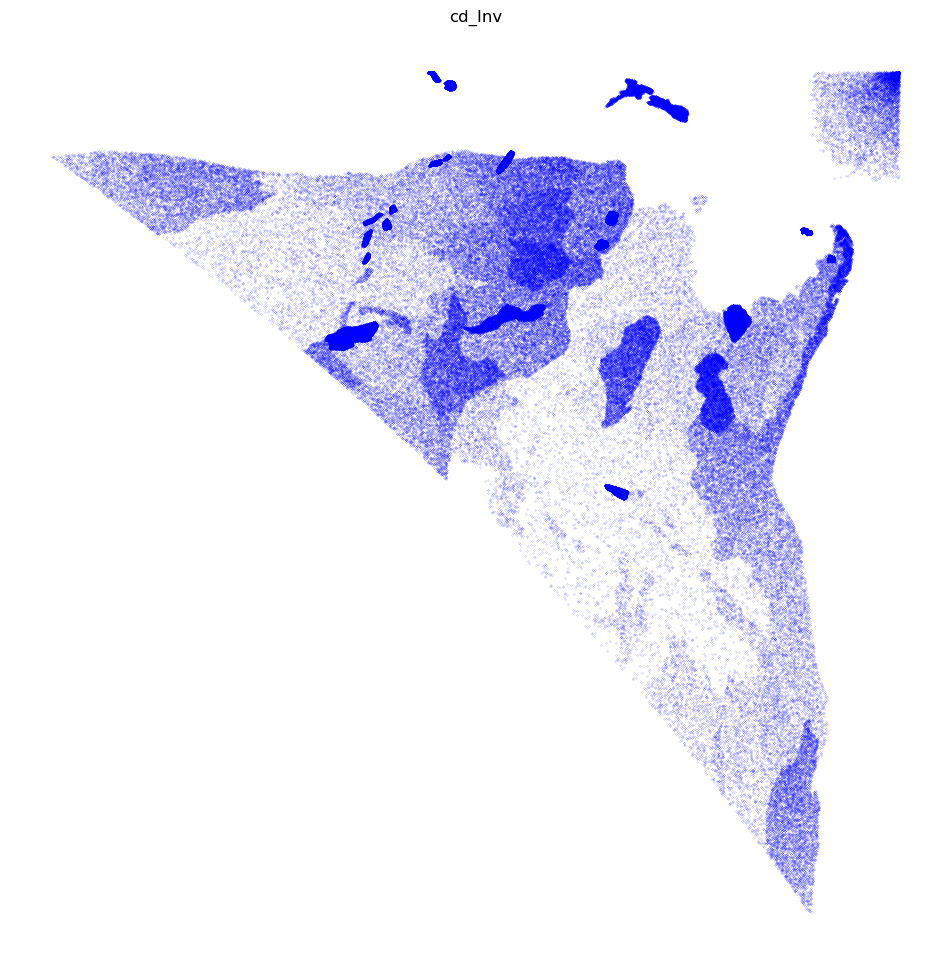

In [8]:
plot_proyeccion(sur, cdi, "cd_Inv")

Se distinguen los continentes uno sobre el otro.